# load libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# load dataset

In [5]:
dataset=pd.read_csv("C:/Users/ssand/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
a=dataset.drop('customerID',axis=1)

In [8]:
a

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
#data cleaning

In [10]:
a.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
a.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
pd.to_numeric(a.TotalCharges)
#some spaces are there

ValueError: Unable to parse string " " at position 488

In [13]:
pd.to_numeric(a.TotalCharges,errors='coerce').isnull()
#error='coerce' will allow us to ignore string called space " " and help the whole dataset to convert it into numeric value
# is null will tell in which row there is khali jagah

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
a[pd.to_numeric(a.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [15]:
a.shape

(7043, 20)

In [16]:
b=a[a.TotalCharges!=' ']

In [17]:
b.shape

(7032, 20)

In [18]:
b.TotalCharges=pd.to_numeric(b.TotalCharges)

C:\Users\ssand\AppData\Local\Temp\ipykernel_19076\653366807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.TotalCharges=pd.to_numeric(b.TotalCharges)


In [19]:
b.TotalCharges.dtypes

dtype('float64')

In [20]:
#data visualization

In [21]:
tenure_churn_no=b[b.Churn=='No'].tenure

In [22]:
tenure_churn_yes=b[b.Churn=='Yes'].tenure

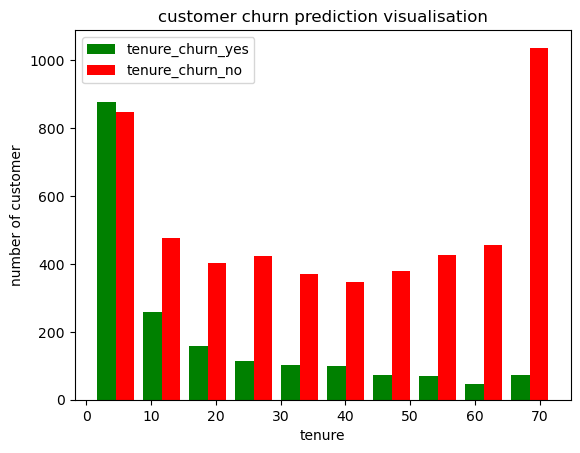

In [23]:
import matplotlib.pyplot as plt
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'])
plt.xlabel("tenure")
plt.ylabel("number of customer")
plt.title("customer churn prediction visualisation")
plt.legend(["tenure_churn_yes", "tenure_churn_no"])
plt.show()

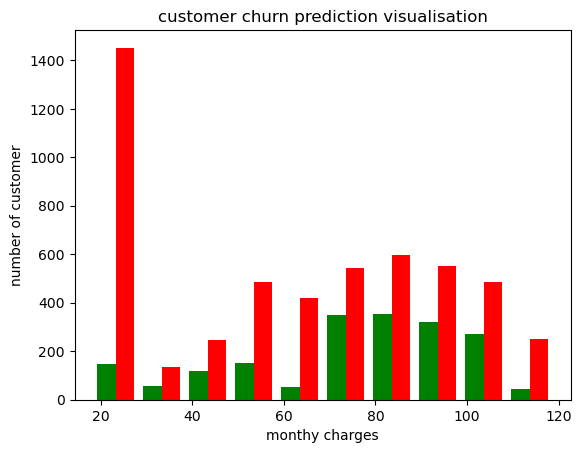

In [24]:
mc_no=b[b.Churn=='No'].MonthlyCharges
mc_yes=b[b.Churn=='Yes'].MonthlyCharges
plt.hist([mc_yes,mc_no],color=['green','red'])
plt.xlabel("monthy charges")
plt.ylabel("number of customer")
plt.title("customer churn prediction visualisation")
plt.show()

In [25]:
#customers with more monthly charges closed to 100 are leaving more
#more no's than yes

In [26]:
def print_unique_col_values(a):
    for column in a:
        if b[column].dtypes=='object':
            print(f'{column}:{a[column].unique()}')

In [27]:
print_unique_col_values(b)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [28]:
b.replace('No internet service','No',inplace = True)
b.replace('No phone service','No',inplace = True)

C:\Users\ssand\AppData\Local\Temp\ipykernel_19076\2875009564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.replace('No internet service','No',inplace = True)
C:\Users\ssand\AppData\Local\Temp\ipykernel_19076\2875009564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.replace('No phone service','No',inplace = True)


In [29]:
print_unique_col_values(b)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [30]:
b = pd.get_dummies(data=b,columns=['InternetService','Contract','PaymentMethod'])
 

In [31]:
b

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,No,No,45,No,No,Yes,No,Yes,...,1,0,0,0,1,0,1,0,0,0
4,Female,0,No,No,2,Yes,No,No,No,No,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
7039,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,...,0,1,0,0,1,0,0,1,0,0
7040,Female,0,Yes,Yes,11,No,No,Yes,No,No,...,1,0,0,1,0,0,0,0,1,0
7041,Male,1,Yes,No,4,Yes,Yes,No,No,No,...,0,1,0,1,0,0,0,0,0,1


In [32]:
cleanup_nums={'Churn':{'Yes':1,'No':0},
                'Partner':{'Yes':1,'No':0},
                'Dependents':{'Yes':1,'No':0},
                'PhoneService':{'Yes':1,'No':0},
                'MultipleLines':{'Yes':1,'No':0},
                'OnlineSecurity':{'Yes':1,'No':0},
                'OnlineBackup':{'Yes':1,'No':0},
                'DeviceProtection':{'Yes':1,'No':0},
                'TechSupport':{'Yes':1,'No':0},
                'StreamingTV':{'Yes':1,'No':0},
                'StreamingMovies':{'Yes':1,'No':0},
                'PaperlessBilling':{'Yes':1,'No':0},
                'gender':{'Male':1,'Female':0},
               }
#do this for only two categories not much
#ex- gender, dependents etc not like contract 

In [33]:
b=b.replace(cleanup_nums)

In [34]:
b

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [35]:
y=b['Churn']

In [36]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [37]:
y=y.values

In [38]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [39]:
x=b.drop('Churn',axis=1)

In [40]:
x=x.values

In [41]:
x

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [42]:
x.shape

(7032, 26)

In [43]:
y.shape

(7032,)

# data spliting

In [44]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
x_train.shape

(5625, 26)

In [46]:
x_test.shape

(1407, 26)

In [47]:
y_test.shape

(1407,)

# feature scaling

In [48]:
scale=MinMaxScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

# model initialization

In [50]:
model=Sequential()
model.add(Dense(20, input_shape=(x_train.shape[1],),kernel_initializer='normal'))
model.add(Dense(5,activation='relu',kernel_initializer='normal'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='normal'))

In [ ]:
# another way to initialize the model
model=Sequential([
    Dense(20, input_shape=(x_train.shape[1],),kernel_initializer='normal'),
    Dense(5,activation='relu',kernel_initializer='normal'),
    Dense(1,activation='sigmoid',kernel_initializer='normal')
            
])

In [54]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5631 - accuracy: 0.7332
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.7877
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.7963
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.7984
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8002
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8025
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8014
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8007
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8005
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4177 - accura

In [56]:
#mean_error=mean_squared_error(y_test,y_predict)

In [57]:
#mean_error

In [58]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8031


[0.4257733225822449, 0.8031272292137146]

In [59]:
y_predict=model.predict(x_test)

44/44 [==============================] - 0s 2ms/step


In [60]:
y_predict

array([[0.2734085 ],
       [0.14833274],
       [0.17525823],
       ...,
       [0.686625  ],
       [0.18046574],
       [0.60661376]], dtype=float32)

In [61]:
y_test[:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [62]:
y_pred=[]
for element in y_predict:
    if element> 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [63]:
y_pred[:10]

[0, 0, 0, 1, 1, 0, 0, 1, 0, 0]

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1038
           1       0.64      0.57      0.60       369

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [65]:
import seaborn as sn
cn=confusion_matrix(y_test,y_pred)

In [66]:
cn

array([[920, 118],
       [159, 210]], dtype=int64)

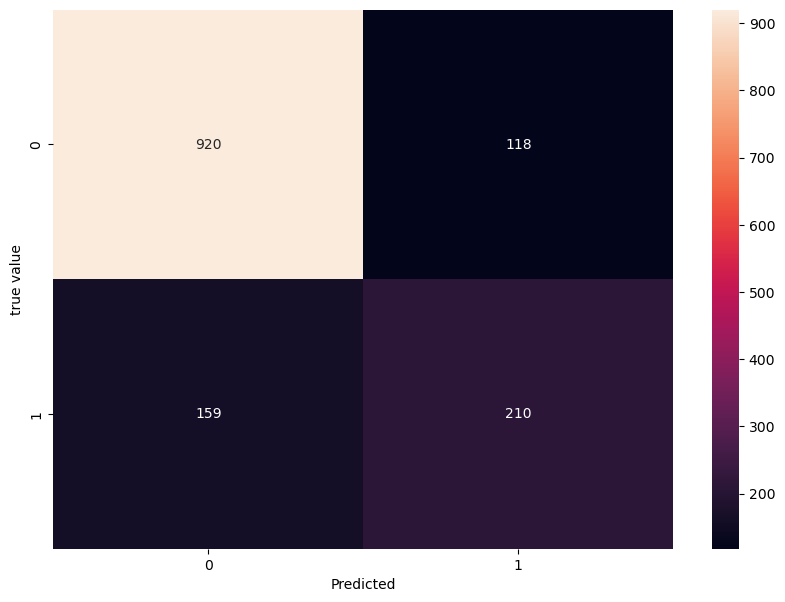

In [67]:
plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('true value')
plt.show()